https://marinecadastre.gov/data/

[Office for Coastal Management, 2023: Nationwide Automatic Identification System 2022, https://www.fisheries.noaa.gov/inport/item/67336](https://www.fisheries.noaa.gov/inport/item/67336)

https://coast.noaa.gov/data/marinecadastre/ais/data-dictionary.pdf

### M.1371 : Technical characteristics for an automatic identification system using time division multiple access in the VHF maritime mobile frequency band (Rec. ITU-R M.1371-5 )

https://www.itu.int/rec/R-REC-M.1371-5-201402-I/en

| Identifier No. | Vessel Type                                                  |
| -------------- | ------------------------------------------------------------ |
| 50             | Special craft                                                |
| 51             | Pilot vessel                                                 |
| 52             | Search and rescue vessels                                    |
| 53             | Tugs                                                         |
| 54             | Port tenders                                                 |
| 55             | Vessels with anti-pollution facilities or equipment          |
| 56             | Law enforcement vessels                                      |
| 57             | Spare – for assignments to local vessels                     |
| 58             | Spare – for assignments to local vessels                     |
| 59             | Medical transports (as defined in the 1949 Geneva Conventions and Additional Protocols) |
| 60             | Ships and aircraft of States not parties to an armed conflict |
| 0X             | Fishing vessels                                              |
| 1X             | Carrying dangerous goods (DG), harmful substances (HS), or marine pollutants (MP), or IMO hazard or pollutant category X |
| 2X             | Towing vessels                                               |
| 3X             | Vessels engaged in dredging or underwater operations         |
| 4X             | Vessels engaged in diving operations                         |
| 5X             | Reserved for future use                                      |
| 6X             | Passenger ships                                              |
| 7X             | Cargo ships                                                  |
| 8X             | Tankers                                                      |
| 9X             | Other types of ships                                         |

Table 53: Identifiers to be used by ships to report their type (Rec. ITU-R M.1371-5)

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Load the AIS June table into a DataFrame
ais_june_df = spark.read.table("ais.june")

# Group by VesselType and calculate the count of rows for each VesselType
vessel_type_counts = ais_june_df.groupBy("VesselType").agg(count("*").alias("RowCount"))

# Sort the DataFrame by count in descending order
sorted_counts = vessel_type_counts.orderBy(col("RowCount").desc())

# Show the resulting DataFrame
sorted_counts.show()

+----------+--------+
|VesselType|RowCount|
+----------+--------+
|        31|79406098|
|        37|53454374|
|        60|19154055|
|        70|16864754|
|        30|16137435|
|        90|15450537|
|        36|12956210|
|        80| 7808857|
|        52| 7249158|
|        57| 5204135|
|         0| 3171373|
|        50| 1416178|
|        99| 1208893|
|        33| 1202407|
|      null| 1088028|
|        71|  921101|
|        79|  786554|
|        51|  607875|
|        89|  559722|
|        69|  527133|
+----------+--------+
only showing top 20 rows



In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Load the AIS June table into a DataFrame
ais_june_df = spark.read.table("ais.june")

# Group by VesselType and calculate the count of rows for each VesselType
vessel_type_counts = ais_june_df.groupBy("VesselType").agg(count("*").alias("RowCount"))

# Filter the DataFrame for counts less than 100,000
vessel_type_counts_lt_100000 = vessel_type_counts.filter(col("RowCount") < 100000)

# Show the resulting DataFrame
vessel_type_counts_lt_100000.show()


+----------+--------+
|VesselType|RowCount|
+----------+--------+
|        85|     321|
|        65|   99780|
|       255|    1076|
|        81|   66038|
|        76|   19046|
|        12|    2502|
|        91|   35980|
|        47|    1101|
|         1|   29985|
|         6|   13097|
|        16|   13698|
|         3|   13674|
|        19|    3616|
|        88|   11789|
|         9|   19709|
|        72|   50201|
|        59|   15976|
|        39|   85721|
|        23|   29871|
|        49|   58016|
+----------+--------+
only showing top 20 rows



In [0]:
vessel_type_counts_lt_100000.count()

Out[7]: 44

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Load the AIS June table into a DataFrame
ais_june_df = spark.read.table("ais.june")

# Group by VesselType and calculate the count of rows for each VesselType
vessel_type_counts = ais_june_df.groupBy("VesselType").agg(count("*").alias("RowCount"))

# Filter the DataFrame for counts less than 100,000
vessel_type_counts_geq_100000 = vessel_type_counts.filter(col("RowCount") >= 100000)

# Show the resulting DataFrame
vessel_type_counts_geq_100000.show()


+----------+--------+
|VesselType|RowCount|
+----------+--------+
|        31|79406098|
|        53|  248684|
|        34|  164820|
|      null| 1088028|
|        52| 7249158|
|        40|  351950|
|        20|  181456|
|        57| 5204135|
|        54|  121266|
|        37|53454374|
|        35|  404309|
|        55|  323673|
|        51|  607875|
|        69|  527133|
|        50| 1416178|
|        38|  126770|
|        82|  249009|
|        80| 7808857|
|        70|16864754|
|        60|19154055|
+----------+--------+
only showing top 20 rows



In [0]:
vessel_type_counts_geq_100000.count()

Out[9]: 32

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Load the AIS June table into a DataFrame
ais_june_df = spark.read.table("ais.june")

# Create a new column "VesselGroup" based on the VesselType ranges
ais_june_df = ais_june_df.withColumn("VesselGroup",
                                     when((col("VesselType") >= 50) & (col("VesselType") <= 60), col("VesselType"))
                                     .when((col("VesselType") >= 70) & (col("VesselType") <= 79), 70)
                                     .when((col("VesselType") >= 80) & (col("VesselType") <= 89), 80)
                                     .when((col("VesselType") >= 90) & (col("VesselType") <= 99), 90)
                                     .otherwise(col("VesselType")))

In [0]:
ais_june_df.printSchema()

root
 |-- MMSI: string (nullable = true)
 |-- BaseDateTime: timestamp (nullable = true)
 |-- LAT: double (nullable = true)
 |-- LON: double (nullable = true)
 |-- SOG: double (nullable = true)
 |-- COG: double (nullable = true)
 |-- Heading: double (nullable = true)
 |-- VesselName: string (nullable = true)
 |-- IMO: string (nullable = true)
 |-- CallSign: string (nullable = true)
 |-- VesselType: integer (nullable = true)
 |-- Status: integer (nullable = true)
 |-- Length: double (nullable = true)
 |-- Width: double (nullable = true)
 |-- Draft: double (nullable = true)
 |-- Cargo: string (nullable = true)
 |-- TranscieverClass: string (nullable = true)
 |-- filename: string (nullable = true)
 |-- VesselGroup: integer (nullable = true)



In [0]:
display(ais_june_df)

In [0]:
# Write the DataFrame with the new column to the Delta table, enabling schema migration
ais_june_df.write.format("delta").option("mergeSchema", "true").mode("overwrite").saveAsTable("ais.june")

In [0]:
%sql
SELECT * FROM ais.june LIMIT 5;

MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TranscieverClass,filename,VesselGroup
367777550,2022-06-01T00:00:02.000+0000,28.10198,-96.93931,0,360,511,HARRY LEE,null,WDJ4420,52,0,0,0,0,52,A,dbfs:/FileStore/tables/AIS_2022_06_01.csv,52
367544180,2022-06-01T00:00:07.000+0000,46.16795,-123.9143,0,342.5,511,JEANNE ARAIN,null,WDG5186,30,15,18,null,null,30,A,dbfs:/FileStore/tables/AIS_2022_06_01.csv,30
368001000,2022-06-01T00:00:04.000+0000,29.05437,-90.2301,7.9,180,168,GRANT CANDIES,IMO9481374,WDE5747,90,0,89,18,6,0,A,dbfs:/FileStore/tables/AIS_2022_06_01.csv,90
366772750,2022-06-01T00:00:04.000+0000,48.52818,-122.801,16.2,276.1,277,WSF YAKIMA,IMO8835360,WCD7863,60,0,116,22,5.5,60,A,dbfs:/FileStore/tables/AIS_2022_06_01.csv,60
368102480,2022-06-01T00:00:03.000+0000,32.77822,-79.95351,0,360,511,CHARLESTON PRINCESS,null,WDK9315,69,0,69,19,2.2,69,A,dbfs:/FileStore/tables/AIS_2022_06_01.csv,69


In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, expr

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Load the AIS June table into a DataFrame
ais_june_df = spark.read.table("ais.june")

# Filter the DataFrame for rows where Cargo is not null and cast Cargo as an integer
cargo_int_df = ais_june_df.filter(col("Cargo").isNotNull()).withColumn("CargoInt", col("Cargo").cast("integer"))

# Calculate the count of rows where Cargo is an integer equal to VesselType
count_matching_rows = cargo_int_df.filter(col("CargoInt") == col("VesselType")).count()

# Calculate the total count of rows
total_count = ais_june_df.count()

# Perform the hypothesis test by comparing the count of matching rows to the total count
p_value = count_matching_rows / total_count

# Print the p-value
print("Hypothesis Test Results:")
print(f"p-value: {p_value}")

Hypothesis Test Results:
p-value: 0.3745965444646247


In [0]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Read the "ais.june" table into a DataFrame
ais_june_df = spark.read.table("ais.june")

# Select distinct values of the "Cargo" attribute
distinct_cargo_values = ais_june_df.select("Cargo").distinct()

# Show the distinct cargo values
display(distinct_cargo_values)


Cargo
51
7
54
200
11
69
29
42
73
64


In [0]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Read the "ais.june" table into a DataFrame
ais_june_df = spark.read.table("ais.june")

# Select distinct values of the "Cargo" attribute
distinct_vesseltype_values = ais_june_df.select("VesselType").distinct()

# Show the distinct cargo values
display(distinct_vesseltype_values)


VesselType
31
65
53
255
34
81
76
12
91
47


In [0]:
from pyspark.sql.functions import col

# Cast "VesselType" to string in distinct_vesseltype_values DataFrame
distinct_vesseltype_values = distinct_vesseltype_values.withColumn("VesselTypeStr", col("VesselType").cast("string"))

# Find the symmetric difference between "Cargo" and "VesselType" values
symmetric_difference = distinct_cargo_values.select("Cargo").exceptAll(distinct_vesseltype_values.select("VesselTypeStr"))

# Show the symmetric difference
display(symmetric_difference)

Cargo
15
11
42
87
64
8
22
28
43
61


In [0]:
from pyspark.sql.functions import col

# Cast "Cargo" to integer in distinct_cargo_values DataFrame
distinct_cargo_values = distinct_cargo_values.withColumn("CargoInt", col("Cargo").cast("integer"))

# Find the symmetric difference between "Cargo" and "VesselType" values
symmetric_difference = distinct_cargo_values.select("CargoInt").exceptAll(distinct_vesseltype_values.select("VesselType"))

# Sort the symmetric difference in ascending order of "CargoInt"
sorted_symmetric_difference = symmetric_difference.orderBy("CargoInt")

# Show the sorted symmetric difference
sorted_symmetric_difference.show(truncate=False)

+--------+
|CargoInt|
+--------+
|2       |
|4       |
|8       |
|11      |
|15      |
|21      |
|22      |
|27      |
|28      |
|41      |
|42      |
|43      |
|44      |
|45      |
|46      |
|61      |
|62      |
|64      |
|77      |
|87      |
+--------+
only showing top 20 rows



In [0]:
from pyspark.sql.functions import col

# Count the number of rows where VesselType is equal to casted Cargo
count_matching_rows = ais_june_df.filter(col("VesselType") == col("Cargo").cast("integer")).count()

# Print the count
print("Number of rows where VesselType = CAST(Cargo as int):", count_matching_rows)

Number of rows where VesselType = CAST(Cargo as int): 93396700


In [0]:
from pyspark.sql.functions import col

# Count the number of rows where VesselType is not equal to casted Cargo
count_non_matching_rows = ais_june_df.filter(col("VesselType") != col("Cargo").cast("integer")).count()

# Print the count
print("Number of rows where VesselType != CAST(Cargo as int):", count_non_matching_rows)

Number of rows where VesselType != CAST(Cargo as int): 82956500


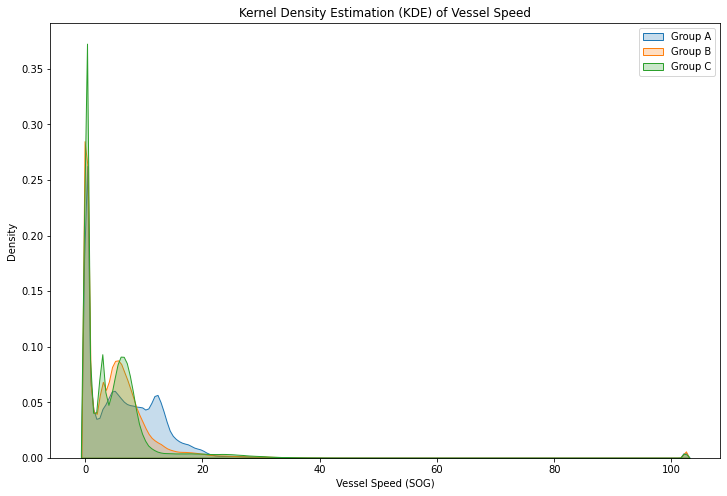

In [0]:
# Filter out missing or invalid values from SOG column
valid_ais_speed_df = ais_speed_df.filter(col("SOG").isNotNull() & (col("SOG") > 0))

# Calculate the groups A, B, and C based on the conditions
group_a_speeds = valid_ais_speed_df.filter(col("VesselType") == expr("CAST(Cargo AS INT)")).select("SOG").rdd.flatMap(lambda x: x).collect()
group_b_speeds = valid_ais_speed_df.filter((col("VesselType") != expr("CAST(Cargo AS INT)")) | col("Cargo").isNull()).select("SOG").rdd.flatMap(lambda x: x).collect()
group_c_speeds = valid_ais_speed_df.filter(col("Cargo").isNull()).select("SOG").rdd.flatMap(lambda x: x).collect()

# Set the figure size using figsize
plt.figure(figsize=(12, 8))

# Plot KDEs for the three groups using Seaborn
sns.kdeplot(data=group_a_speeds, shade=True, label="Group A")
sns.kdeplot(data=group_b_speeds, shade=True, label="Group B")
sns.kdeplot(data=group_c_speeds, shade=True, label="Group C")

# Set plot labels and title
plt.xlabel("Vessel Speed (SOG)")
plt.ylabel("Density")
plt.title("Kernel Density Estimation (KDE) of Vessel Speed")
plt.legend()

# Show the plot
plt.show()


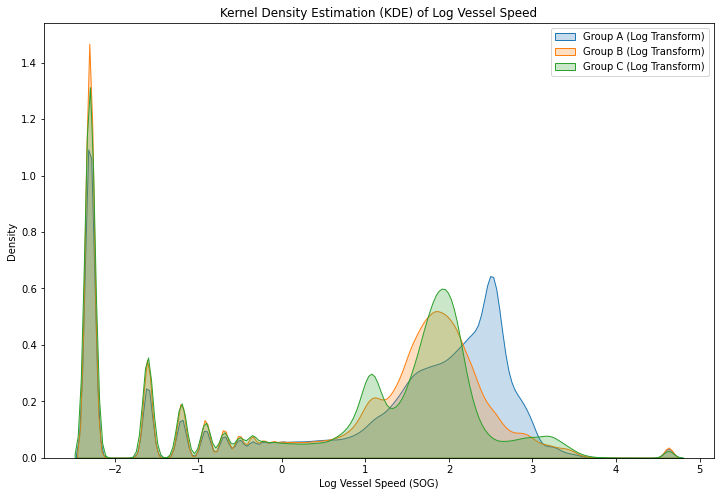

In [0]:
import numpy as np

# Apply log transformation to the data
log_group_a_speeds = np.log(group_a_speeds)
log_group_b_speeds = np.log(group_b_speeds)
log_group_c_speeds = np.log(group_c_speeds)

# Set the figure size using figsize
plt.figure(figsize=(12, 8))

# Plot KDEs for the three groups using Seaborn
sns.kdeplot(data=log_group_a_speeds, shade=True, label="Group A (Log Transform)")
sns.kdeplot(data=log_group_b_speeds, shade=True, label="Group B (Log Transform)")
sns.kdeplot(data=log_group_c_speeds, shade=True, label="Group C (Log Transform)")

# Set plot labels and title
plt.xlabel("Log Vessel Speed (SOG)")
plt.ylabel("Density")
plt.title("Kernel Density Estimation (KDE) of Log Vessel Speed")
plt.legend()

# Show the plot
plt.show()

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, approx_count_distinct

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Load the AIS June table into a DataFrame
ais_june_df = spark.read.table("ais.june")

# Group by MMSI and calculate the count of rows for each MMSI
mmsi_row_count = ais_june_df.groupBy("MMSI").agg(count("*").alias("RowCount"))

# Group by MMSI and calculate the distinct count of Cargo using approx_count_distinct
mmsi_cargo_count = ais_june_df.groupBy("MMSI").agg(approx_count_distinct("Cargo", 0.05).alias("DistinctCargoCount"))

# Join the two DataFrames on MMSI
mmsi_counts = mmsi_row_count.join(mmsi_cargo_count, "MMSI")

# Calculate the total count of rows and the total count of distinct cargo values
total_row_count = mmsi_counts.select(count("*")).first()[0]

# Print the overall statistics
print(f"Total Row Count: {total_row_count}")

Total Row Count: 45427


In [0]:
cargo_type_change = mmsi_counts.filter(col("DistinctCargoCount") > 1)
cargo_type_change.show(truncate=False)

+---------+--------+------------------+
|MMSI     |RowCount|DistinctCargoCount|
+---------+--------+------------------+
|367053940|36352   |2                 |
|367328790|36100   |2                 |
|367098280|28174   |2                 |
|367479650|22611   |2                 |
|368132360|33230   |2                 |
|563079000|2184    |2                 |
|477634900|2539    |3                 |
|368165680|164     |2                 |
|366941860|35893   |2                 |
|367083580|34774   |2                 |
|255792000|2083    |2                 |
|367128950|20880   |2                 |
|538009307|9591    |2                 |
|256764000|4126    |2                 |
|366952360|27933   |2                 |
|366984880|9477    |2                 |
|368182130|27214   |2                 |
|367852000|12183   |2                 |
|720181000|4275    |2                 |
|367702070|24164   |2                 |
+---------+--------+------------------+
only showing top 20 rows



In [0]:
cargo_type_change.count()

Out[26]: 1601